In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, f1_score

In [5]:
def plot_predictions(y_true, y_pred, title, color):
    plt.figure(figsize=(12, 4))
    plt.scatter(range(len(y_true)), y_true, label='Истинные значения', c='black', marker='o', alpha=0.6)
    plt.scatter(range(len(y_pred)), y_pred, label='Предсказания', c=color, marker='x')
    plt.title(title)
    plt.xlabel('Индекс примера')
    plt.ylabel('Класс (0 = нет диабета, 1 = диабет)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [6]:
# Загрузка данных
df = pd.read_csv('dataset/diabetes.csv')

# Заменим нули на NaN в признаках, где 0 — недопустимое значение
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Заполним пропуски медианой
df[cols_with_zero] = df[cols_with_zero].fillna(df[cols_with_zero].median())

# Разделим признаки и целевую переменную
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Масштабируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Деление данных на обучающую (600 строк) и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, train_size=700, stratify=y, random_state=42
)

In [7]:
# =====================
# Обучение моделей
# =====================

# Логистическая регрессия
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Дерево решений
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [8]:
# =====================
# Оценка моделей
# =====================

def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{name}:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print()

evaluate_model("Логистическая регрессия", y_test, y_pred_log)
evaluate_model("SVM", y_test, y_pred_svm)
evaluate_model("Дерево решений", y_test, y_pred_tree)

Логистическая регрессия:
  Accuracy: 0.7500
  F1-score: 0.6531

SVM:
  Accuracy: 0.7647
  F1-score: 0.6667

Дерево решений:
  Accuracy: 0.7500
  F1-score: 0.6047



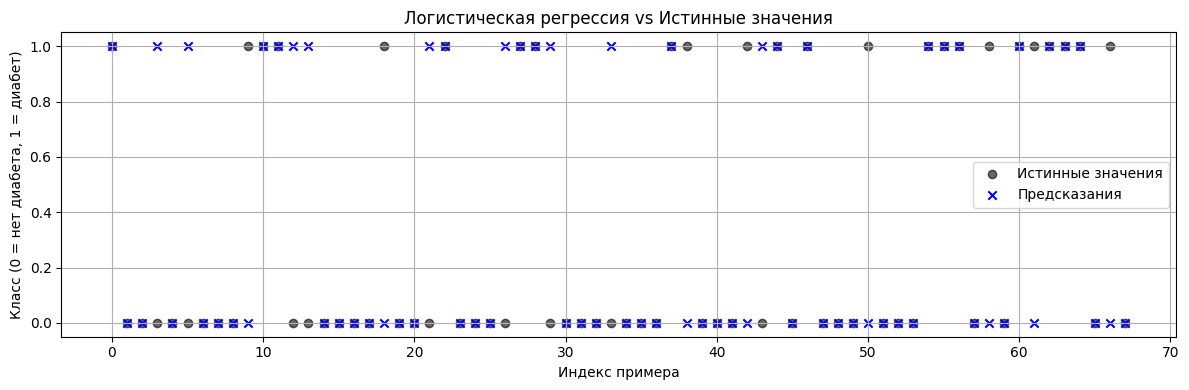

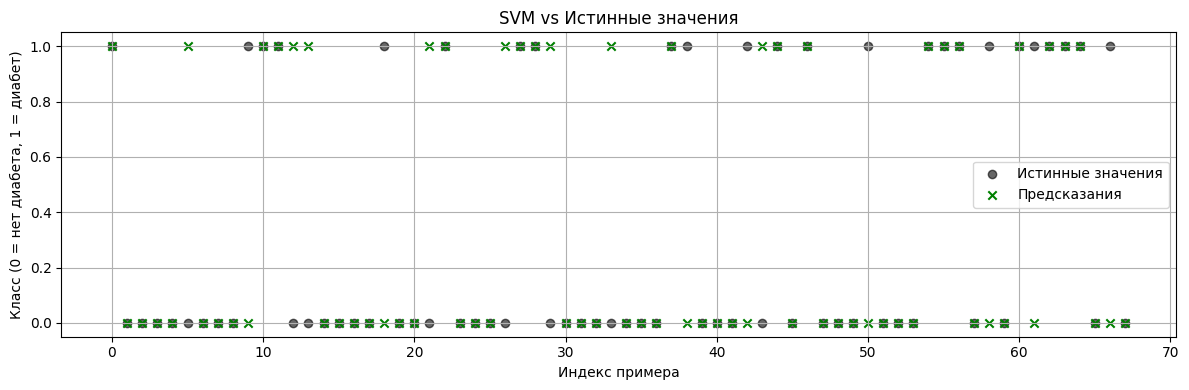

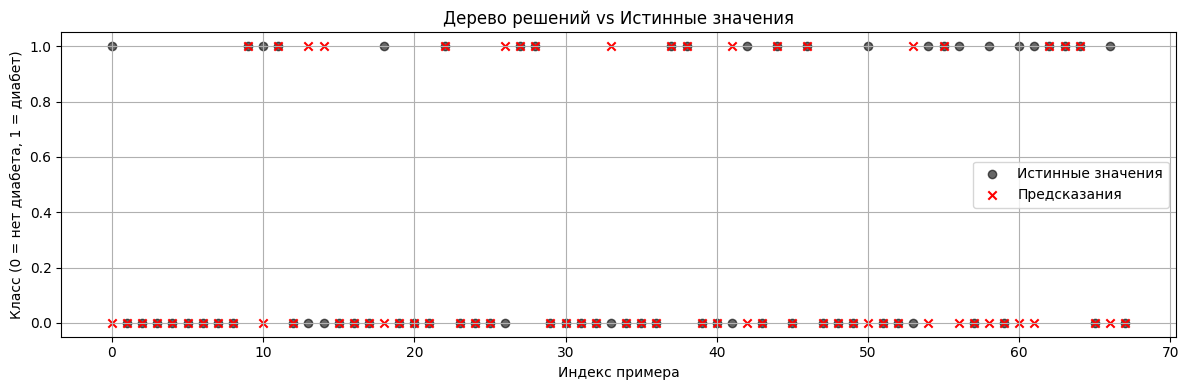

In [9]:
# =====================
# Отдельные графики сравнения предсказаний с реальностью
# =====================

plot_predictions(y_test.values, y_pred_log, 'Логистическая регрессия vs Истинные значения', 'blue')
plot_predictions(y_test.values, y_pred_svm, 'SVM vs Истинные значения', 'green')
plot_predictions(y_test.values, y_pred_tree, 'Дерево решений vs Истинные значения', 'red')

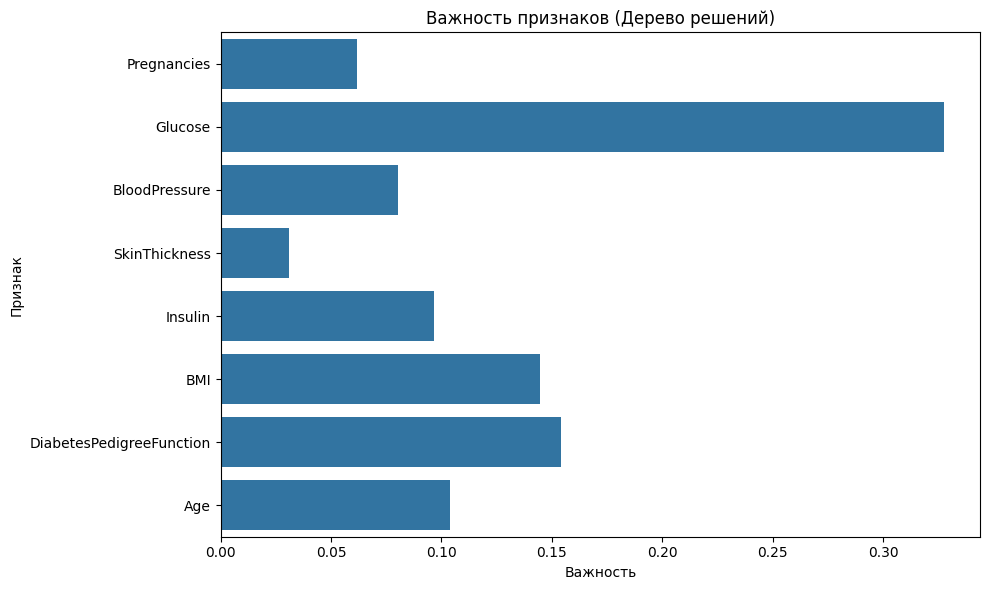

In [10]:
# =====================
# Важность признаков (для дерева)
# =====================

importances = tree_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Важность признаков (Дерево решений)')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()

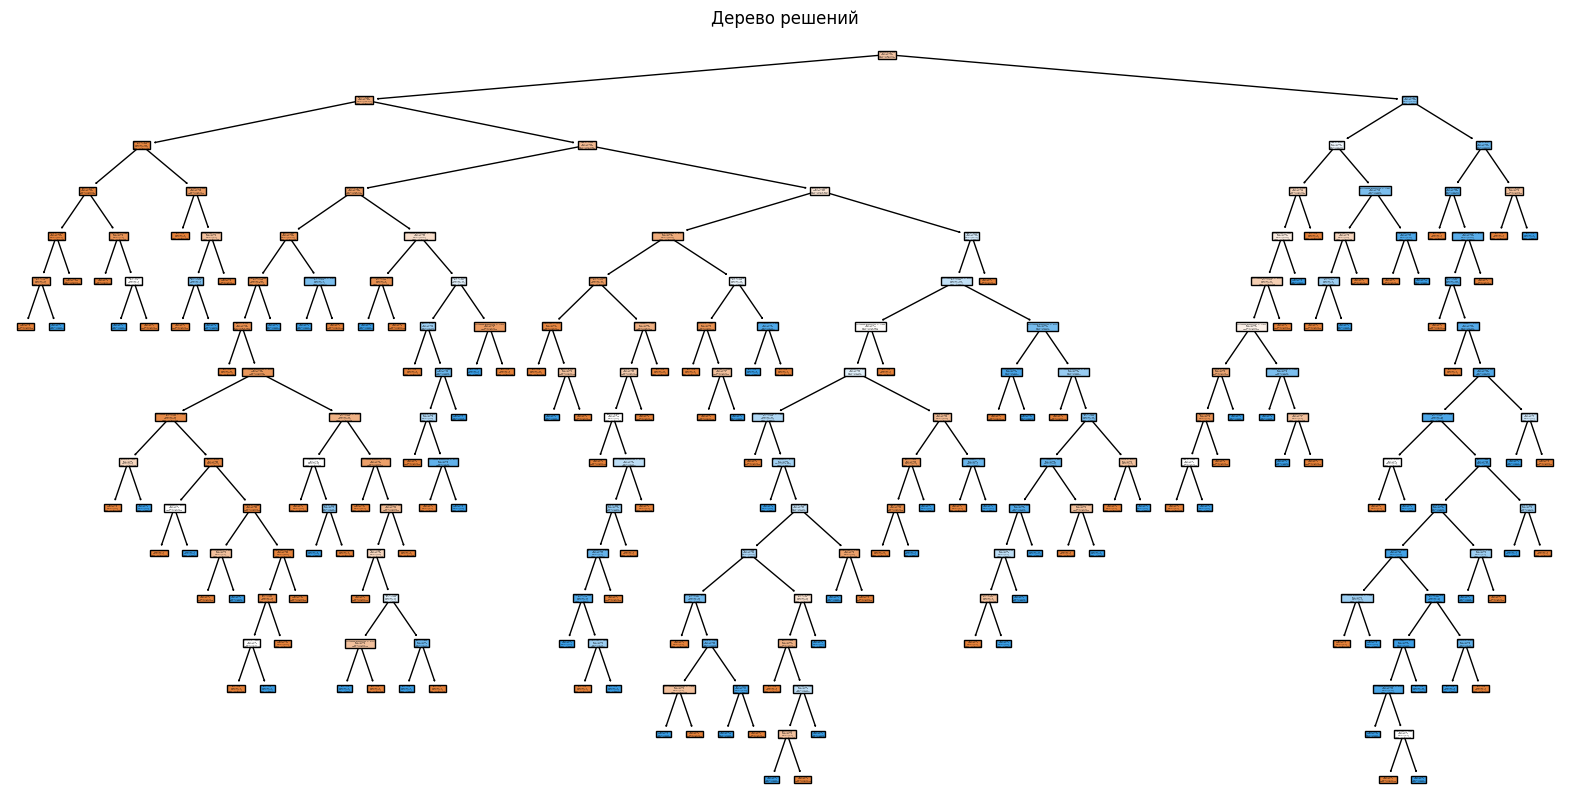

In [11]:
# =====================
# Визуализация дерева решений
# =====================

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=feature_names, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title('Дерево решений')
plt.show()

In [12]:
# =====================
# Правила дерева решений в текстовом виде
# =====================

rules_text = export_text(tree_model, feature_names=list(feature_names))
print("\nПравила дерева решений:\n")
print(rules_text)


Правила дерева решений:

|--- Glucose <= 0.72
|   |--- BMI <= -0.80
|   |   |--- Glucose <= 0.22
|   |   |   |--- BMI <= -0.87
|   |   |   |   |--- Insulin <= -1.07
|   |   |   |   |   |--- Insulin <= -1.09
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Insulin >  -1.09
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Insulin >  -1.07
|   |   |   |   |   |--- class: 0
|   |   |   |--- BMI >  -0.87
|   |   |   |   |--- Pregnancies <= 0.79
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  0.79
|   |   |   |   |   |--- Age <= 1.04
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  1.04
|   |   |   |   |   |   |--- class: 0
|   |   |--- Glucose >  0.22
|   |   |   |--- Pregnancies <= -0.40
|   |   |   |   |--- class: 0
|   |   |   |--- Pregnancies >  -0.40
|   |   |   |   |--- Pregnancies <= 0.19
|   |   |   |   |   |--- BMI <= -1.31
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- BMI >  -1.31
|   |   |   |   